<a href="https://colab.research.google.com/github/esusrutha/zeroshot/blob/main/S_BERT_KGtweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=a0dfe7b3247559904698434e469b16a0f63d09564b443c7a99ddfc5098c12156
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


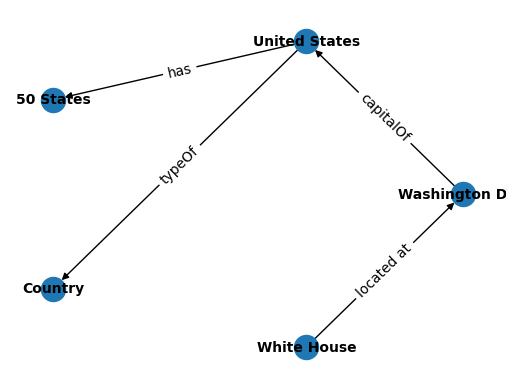

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Define the nodes and relations
knowledge_graph = [
    ('Washington D.C.', 'capitalOf', 'United States'),
    ('United States', 'has', '50 States'),
    ('United States', 'typeOf', 'Country'),
    ('White House', 'located at', 'Washington D.C.')
]

# Create a NetworkX graph
graph = nx.DiGraph()  # Use DiGraph instead of Graph to indicate directed edges

# Iterate through the knowledge graph and retrieve additional information from ConceptNet API
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]

    # Make a request to ConceptNet API to fetch additional information
    api_url = f'http://api.conceptnet.io/c/en/{source}?rel=/r/{relation}&end=/c/en/{target}'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()

        # Extract the weight from the API response
        weight = 1.0  # Default weight if not found
        if 'edges' in data and len(data['edges']) > 0 and 'weight' in data['edges'][0]:
            weight = data['edges'][0]['weight']

        # Add directed edges to the graph
        graph.add_edge(source, target, relation=relation, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(graph)

# Draw nodes and edges with arrowheads
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, arrows=True)  # Set arrows=True for directed edges

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()
Knowledge_graph = graph

In [5]:
sentences = []
for edge in Knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]
    sentence = f"{source} {relation} {target}"
    sentences.append(sentence)


In [8]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
word_counts = Counter([word for sentence in tokenized_sentences for word in sentence])
vocabulary = list(word_counts.keys())


In [15]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-300')


[=================================================-] 98.6% 370.8/376.1MB downloaded


In [16]:
word_vectors = {word: glove_model[word] for word in vocabulary if word in glove_model}


In [17]:
knowledge_graph_embedding = []
for sentence in tokenized_sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    if sentence_vectors:
        avg_vector = sum(sentence_vectors) / len(sentence_vectors)
        knowledge_graph_embedding.append(avg_vector)


In [ ]:
for embedding in knowledge_graph_embedding:
    print(embedding)


In [20]:
from sentence_transformers import SentenceTransformer, models


In [21]:
model_name =SentenceTransformer('bert-base-nli-mean-tokens')


In [22]:
from sentence_transformers import SentenceTransformer

model_name = 'bert-base-nli-mean-tokens'
sbert_model = SentenceTransformer(model_name)

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
import nltk
from transformers import AutoTokenizer

# Load the pre-trained S-BERT model tokenizer
model_name = "sentence-transformers/bert-base-nli-mean-tokens"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Download the list of common English words from nltk
nltk.download("words")
common_words = set(nltk.corpus.words.words())

# Get the vocabulary words from the S-BERT model
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())

# Filter the vocabulary words to keep only the common English words
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]

# Get the most common vocabulary words based on their frequencies
top_n = 50
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]

# Store the most common vocabulary words in a list
stored_words = [word for word, _ in most_common_vocab]

# Print the stored vocabulary words
for word in stored_words:
    print(word)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


thyroid
nitrate
genealogical
dowry
collarbone
arsenic
pudding
disgrace
wreath
wince
inhuman
bobbed
papyrus
flourishing
penitentiary
inflated
boredom
abolitionist
squeak
enthusiast
infiltrate
upstate
rosewood
patrice
vet
foreigner
colossal
earthly
deprivation
taluka
stanza
embroidery
adventurer
unbroken
lough
adamant
polka
boardwalk
reindeer
attache
persist
enamel
effortlessly
yearning
loosen
ie
decorate
covent
strive
tread


In [25]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
vocabulary_embeddings=model.encode(stored_words)
print(vocabulary_embeddings)

[[ 0.4887316   0.06500868  0.47772422 ... -0.40955648  0.46699142
   0.07069289]
 [ 0.04716921  0.11385528  1.4651852  ...  0.26741937  0.7261961
   0.02695823]
 [-0.12113438  0.06735776  1.866991   ... -0.4632953  -0.17647363
   0.27586946]
 ...
 [-0.2912015  -0.5358622   2.1869428  ... -0.28055057 -0.13021672
   0.34846464]
 [ 0.25023955 -0.3493019   2.8944747  ... -0.4670918  -0.5353251
  -0.12669642]
 [ 0.5686533   0.12271688  2.1050196  ...  0.25418982 -0.1013087
   0.20984882]]


In [26]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}

In [27]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[-0.60309    0.43521    0.34076   -0.19945   -0.18648   -0.15395
 -0.3279    -0.18652   -0.10225   -0.27165   -0.81234    0.16711
 -0.65959   -0.093957  -0.65127    0.27834   -0.065087  -0.025754
 -0.46885    0.56334   -0.98922   -1.0424     0.15841   -0.53695
 -1.0966    -0.11377    0.12691   -0.28586   -0.38626    0.04408
  0.0095898  0.46223    0.40411   -0.35763    0.24802   -0.44011
 -0.049788   0.083146   0.23668    0.42204   -0.28741    0.45853
  0.42975   -1.1337    -0.010538  -0.064561  -0.30434    0.29693
 -0.51822    0.1545    -0.6576     0.19796    0.70584   -0.14076
 -0.30189   -0.38828   -0.26378    0.29245    0.50493    0.52774
 -0.15774   -0.13065    0.86067   -0.76376   -0.52396   -0.34766
 -0.76526    1.2282    -0.56637    0.40671    0.64794    0.2427
  0.37366    0.16699   -0.048311  -0.8844    -0.58703   -0.74998
  0.19419    0.25094   -0.28921    0.2612     0.85479    0.52452
 -0.29366    1.0324    -0.044289  -0.090738  -0.42323   -0.22433
 -0.50208   -0.052621  -0

In [28]:
import numpy as np

def learn_projection_matrix(embeddings, Y):
    # Center the S-BERT embeddings
    embeddings_centered = embeddings - np.mean(embeddings, axis=0)

    # Center the knowledge graph embeddings
    embedding_centered = embedding - np.mean(Y, axis=0)

    # Perform singular value decomposition on X
    U, S, VT = np.linalg.svd(embeddings_centered, full_matrices=False)

    # Construct the projection matrix
    P = VT.T @ U.T

    # Project the centered knowledge graph embeddings
    embedding_projected = embeddings_centered @ P

    return P, embedding_projected

# Example usage
# Assume X and Y are the S-BERT embeddings and knowledge graph embeddings respectively

# Generate random S-BERT embeddings and knowledge graph embeddings for demonstration
np.random.seed(42)
embeddings = np.random.rand(100, 50)
embedding = np.random.rand(100, 100)

# Learn the projection matrix
projection_matrix, projected_embeddings = learn_projection_matrix(embeddings, embedding)

# Print the projection matrix
print("Projection Matrix:")
print(projection_matrix)

# Print the projected knowledge graph embeddings
print("Projected Knowledge Graph Embeddings:")
print(projected_embeddings)


Projection Matrix:
[[-0.09530814  0.17247475 -0.09358466 ...  0.14192177 -0.1597433
  -0.03208431]
 [ 0.12331812  0.09035316  0.07318327 ... -0.00850685 -0.00285291
  -0.13983809]
 [ 0.06349116  0.14512936 -0.14235402 ...  0.08170926 -0.12210049
   0.02182195]
 ...
 [-0.00057901  0.09942775  0.02374778 ... -0.07940023  0.06602151
  -0.10459959]
 [-0.01308586 -0.15820529 -0.14251553 ... -0.1463997   0.06872969
   0.10336344]
 [-0.11006908 -0.08220933 -0.03814088 ...  0.16363046  0.1060267
  -0.01839051]]
Projected Knowledge Graph Embeddings:
[[ 1.29982025 -0.02232146 -0.10162462 ... -0.03898049 -0.36609878
  -0.02276538]
 [-0.02232146  1.55056445 -0.08702494 ... -0.05133531 -0.23956438
  -0.0634575 ]
 [-0.10162462 -0.08702494  1.49006846 ...  0.00516557  0.02108053
   0.14986073]
 ...
 [-0.03898049 -0.05133531  0.00516557 ...  1.37167816 -0.03615348
  -0.33672569]
 [-0.36609878 -0.23956438  0.02108053 ... -0.03615348  1.32426477
  -0.04661303]
 [-0.02276538 -0.0634575   0.14986073 ... -

In [49]:
import numpy as np

def project_embedding(labels_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = labels_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embedding = embedding_centered @ projection_matrix

    return projected_embedding

# Example usage
# Assume labels_embeddings is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
embedding = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embedding = project_embedding(labels_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embedding)


ValueError: ignored

In [29]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pandas as pd
import re

In [38]:
df = pd.read_csv('/content/drive/MyDrive/D1.csv', encoding='latin1', engine='python')


In [39]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=9821e51b79170cf4672e6e738451734d2b6d4d60929f84d5b07df25d9ea211d3
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji


In [40]:
import re
import emoji
import string

def preprocess_text(tweet):
    if isinstance(tweet, str):  # Check if tweet is a string
        # Convert text to lowercase
        tweet = tweet.lower()

        # Remove URLs
        tweet = re.sub(r'http\S+|www\S+', '', tweet)

        # Remove punctuation
        tweet = tweet.translate(str.maketrans('', '', string.punctuation))

        # Remove question marks
        tweet = tweet.replace('?', '')

        # Convert emojis to textual representation
        tweet = emoji.demojize(tweet)

    return tweet

In [41]:
df['tweet'] = df['tweet'].apply(preprocess_text)


In [42]:
df.to_csv('preprocessed_file.csv', index=False)

In [43]:
df = pd.read_csv('preprocessed_file.csv')

In [44]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the pre-trained S-BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Assume you have a DataFrame named df with a column named 'text'
df = pd.read_csv('preprocessed_file.csv')

# Get the column values as a list
sentences = df['tweet'].tolist()

In [46]:
sentences_embeddings = model.encode(sentences)

In [31]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
labels_embeddings=model.encode(label)
print(labels_embeddings)

[ 2.45756209e-01  5.91305017e-01  1.32814133e+00 -1.26073539e-01
  1.33296385e-01  6.75171465e-02  6.65551424e-01  7.02646911e-01
 -1.04869716e-01 -6.65794790e-01 -1.14394653e+00  1.12623775e+00
  5.32939792e-01  9.93040264e-01  6.19690567e-02  2.33048677e-01
 -5.17691553e-01 -3.58770013e-01  3.40320826e-01 -1.18802711e-01
 -2.06725150e-01 -3.34257722e-01 -4.24743831e-01 -1.17487155e-01
  3.16874832e-01 -1.26082689e-01 -3.84350985e-01 -1.37222862e+00
 -5.52270472e-01 -1.14862181e-01  3.63281608e-01 -2.70295709e-01
  9.21263158e-01 -9.31076705e-02  5.31410158e-01  3.10967118e-01
  3.88710529e-01  2.93576837e-01 -1.39761537e-01 -1.23172618e-01
  5.25234461e-01  2.16960907e-04  1.18535221e+00  2.96403736e-01
  1.66669324e-01 -4.28105831e-01 -1.56251878e-01  4.46004570e-01
 -1.29986227e+00 -5.19923031e-01 -4.05445606e-01 -7.34721482e-01
  6.19266868e-01  8.02624941e-01 -4.48033452e-01  3.19362581e-01
  2.44055390e-01 -7.06705570e-01  8.07696760e-01  4.99537170e-01
 -3.16229388e-02 -2.58573

In [32]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Preprocess and extract sentences from each category
for category in categories_list:
    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []

    # Get documents for the current category
    documents = fetch_20newsgroups(subset='all', categories=[category])

    for document in documents.data:
        # Remove question marks, special symbols, numbers, and URLs
        text = re.sub(r'\?', '', document)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Preprocess and add sentences to the list
        for sentence in sentences:
            # Remove leading/trailing whitespaces
            sentence = sentence.strip()

            # Skip empty sentences
            if not sentence:
                continue

            preprocessed_sentences.append(sentence)

    # Print the preprocessed sentences
    for sentence in preprocessed_sentences:
        print(sentence)
    print("\n")


from acoopermacccmacalstredu turin turambar me department of utter misery
subject re societally acceptable behavior
organization macalester college
lines 

in article csasnewscsouiucedu cobbalexialisuiucedu mike cobb writes
 i guess im delving into a religious language area  what exactly is morality 
 or morals  

i hope there is not one with a subject like this you just have a spiral  what
would then be a morality of a morality of morals  labels dont make arguments 
one really needs a solid measuring stick by which most actions can be
interpreted even though this would hardly seem moral  for example the best
thing for me is to ensure that i will eat and drink enough  hence all actions
must be weighed against this one statement  whatever helps this goal is
moral whatever does not is immoral

of course this leads such a blank space there are so many different ways to
fulfill a goal one would need a hypermorality to apply to just the methods

i never thought of eating meat to be moral or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
design of the box is all wrong wouldve been better if ms had put most
of windows on a plugin rom card from day one priced at  or
so people woulda loved it

apple had the right idea just stumbled a bit in the execution

pete


peter l wargo       wargoplsunsoeclarksonedu  email saves trees
documentation                                     it also makes the
enable software       x          world smaller
from doucetfsquadmnorg andrew geweke
subject lc ii slowdowns
organization tfsquad public access usenet st paul mn    
lines 

        i am currently managing among many other labs a lab with three 
lc iis a mac plus with  mb external hd and a laserwriter ii ntx my 
problem the lc iis seem to intermittently slow to a snails pace
        these lc iis have  mb ram k vram and a quantum lps hd 
installed i have reformatted the drive with hard disk toolkit  and 
it gives a very respectable  overall rating to this drive so its not 
the drive i h

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
of course these postings sould be in soccultureus but if we reduce
crime here it ll mean less car insurance rates thus we could spend
more money on modifing our cars now my posting is recautostech 
revelant

vlasis  theodore


software engineer
idb mobile communications

sig under development 

i remember this happening on the i through michigan and ohio several
years back a group of guys in an old beater would rear end a car
usually out of state or canadians you stop and they smack you with a bb
bat at least they didnt kill you for the sake of a car
i think the cops put out decoys and this calmed down for a while

vlasis are you safe walking through germany if you are a refugee
from musicerichtriumfca fred w bach
subject re warningplease read
organization triumf triuniversity meson facility
lines 
distribution world
nntppostinghost erichtriumfca
newssoftware vaxvms vnews     

in article aprconvexcom tobiasconvexcom allen tobias write

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
good quotes

id give it a  out of 



                        allan sullivan allancsualbertaca
                        department of computing science
                 university of alberta edmonton alberta canada
                    
            my opinions are mine and mine alone

it is amazing how much can be accomplished if no one cares who gets the
 credit           u of a golden bears hockey motto c drake
organization penn state university
from robbie po rappsuvmpsuedu
subject re blues sweep blackhawks
 aprramseycslaurentianca
 aprwueclwustledu rappsuvmpsuedu
lines 

in article rappsuvmpsuedu robbie po rappsuvmpsuedu
says
michael virata sy says
michael sy
mvscecwustledu devils consultant
and how bout those devils   over the penguins  hahahahahahah


attention all penguins fans  if the pens  win game   show some laughter
in that email box address listed above  thanks 


attention penguins fans once again apparently  of you underst

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from dstockhpqmocasqfhpcom david stockton
subject re krillean photography
nntppostinghost hpqmocbsqfhpcom
organization hewlettpackard ltd south queensferry scotland
xnewsreader tin version  pl
lines 

vinci filipevxcrnacernch wrote



  how about kirlian imaging  i believe the faq for sciskeptics sp
  has a nice writeup on this they would certainly be most supportive
  on helping you to build such a device and connect to a kvolt
  supply so that you can take a serious look at your aura 

  filipe santos
  cern  european laboratory for particle physics
  switzerland


    this has to be the only generally accepted method of using common 
physics lab equipment to find certain answers to all the questions about
afterlifes heavens hells purgatory gods etc krillean photography
will probably be ignored as insignificant compared to these larger
eternal verities publishing your results could be a bit of a problem
though

   cheers
             david
from stgpraostunocalcom richard ottolini
sub

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from sciysgnusunixnussg yung shing gene
subject mission aviation fellowship
organization national university of singapore
lines 

hi
	does anyone know anything about this group and what they
do any info would be appreciated thanks
from whitsebdnextworkrosehulmanedu bryan whitsell
subject re satan and tv
replyto whitsebdnextworkrosehulmanedu
organization news service at rosehulman
lines 

in article mayathosrutgersedu  
salarisniblickecnpurdueedu rrrrrrrrrrrrrrrabbits writes
 mtv controls what bands are popular no matter how bad they are  in fact it is  
better to be politically correct  like u madonna  than to have any musical  
talent 
 steven c salaris                
 
interesting idea  
regular televeision seems to do this sort of thing too with politically correct  
shows


in christs love
bryan
from whitsebdnextworkrosehulmanedu bryan whitsell
subject re accepting jesus in your heart
replyto whitsebdnextworkrosehulmanedu
organization computer science department at rosehulman
line

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
new zealand was willing to cooperate and south georgia island
was virtually uninhabited except for a whaling station on the
northeast coast  the whaling station was some  miles away from
the secret new installation which was being built but britain
took no chances  in  the whaling station was closed down 
since that time there have been no inhabitants on south georgia
island except for a few dozen alleged antarctic scientists

   construction of the secret naval facilitiestwo in new
zealand one on south georgia islandbegan in the early s 
the techniques were adapted from those used previously to build
other large underground facilities such as the norad
installation inside cheyenne mountain colorado however these
techniques were adapted in radically new ways to achieve
construction access directly from the sea instead of overland 
in this way the sheltering mountain was left undisturbed in
appearance both during and after construction


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences_embeddings=model.encode(sentence)
print(sentences_embeddings)

[ 1.09040253e-02  1.33285344e+00  6.66448712e-01  1.34605080e-01
 -5.37390076e-03 -5.14817715e-01  1.49951875e+00 -3.78864348e-01
  2.08912827e-02 -1.36235312e-01 -5.53271055e-01  4.55447197e-01
  2.11144667e-02  4.65425134e-01 -1.01658332e+00  8.43070626e-01
 -2.37012118e-01 -3.39166582e-01 -3.07052672e-01  1.24860376e-01
 -2.88823456e-01 -6.65833354e-01  5.14435291e-01  4.39306408e-01
  1.37753367e+00  1.06917989e+00 -2.22981274e-01  5.54556809e-02
 -1.87858999e+00  5.81222057e-01 -1.29639447e-01 -1.96235284e-01
 -3.03638667e-01 -6.40681013e-02 -1.47274435e-01  6.71839833e-01
  6.75201416e-01 -4.76230741e-01  3.70623231e-01  1.99202403e-01
 -1.18417293e-01  3.49693447e-01 -2.60720611e-01 -2.06658002e-02
 -3.42278302e-01 -2.76799947e-02  1.12435544e+00  3.08227062e-01
  5.06314337e-01 -7.84928381e-01  6.58134222e-01  4.43810493e-01
  3.36649120e-01  1.12226516e-01  1.45687491e-01 -7.20396757e-01
  4.11478393e-02 -1.00916481e+00 -8.52265596e-01 -7.12945640e-01
 -1.47198367e+00  3.36915

In [ ]:
import numpy as np

def project_embedding(sentences_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = sentences_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embeddings = embedding_centered @ projection_matrix

    return projected_embeddings

# Example usage
# Assume embedding is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
sentences_embeddings = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embeddings = project_embedding(sentences_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embeddings)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(sentence_embedding, projected_embeddings, categories_list):
    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(sentence_embedding.reshape(1, -1), projected_embeddings)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_embeddings is the matrix of projected embeddings for all labels
# Assume labels is the list of labels corresponding to the projected_embeddings

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
labels = ['label1', 'label2', 'label3', ...]  # Replace ... with the remaining labels

# Generate a random sentence embedding for demonstration
sentence_embedding = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(sentence_embedding, projected_embeddings, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


In [ ]:
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

# Load the dataset
newsgroups_data = fetch_20newsgroups(subset='all')

# Get the category labels and corresponding text documents
categories = newsgroups_data.target_names
documents = newsgroups_data.data

# Initialize a dictionary to store the vocabulary for each category
category_vocabularies = {}

# Define stopwords and punctuation marks
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(punctuation)

# Iterate through each category
for category in categories:
    # Filter documents by category
    category_documents = [doc for doc, target in zip(documents, newsgroups_data.target) if newsgroups_data.target_names[target] == category]

    # Preprocess the text (example: tokenization and lowercase conversion)
    preprocessed_documents = [word_tokenize(doc.lower()) for doc in category_documents]

    # Filter out stopwords, punctuation, numbers, and non-word characters
    filtered_documents = [[word for word in doc if word.isalpha() and word not in stopwords_set] for doc in preprocessed_documents]

    # Create a vocabulary for the category
    category_vocabulary = set([word for doc in filtered_documents for word in doc])

    # Store the category vocabulary
    category_vocabularies[category] = category_vocabulary

# Find the common vocabulary across all categories
common_vocabulary = set.intersection(*category_vocabularies.values())

# Print the common vocabulary
print("Common Vocabulary:")
print(f"Vocabulary size: {len(common_vocabulary)}")
print(f"Sample words: {list(common_vocabulary)[:100]}")


Common Vocabulary:
Vocabulary size: 1434
Sample words: ['except', 'passing', 'ohio', 'design', 'local', 'basically', 'official', 'tape', 'terms', 'dave', 'pretty', 'determined', 'ago', 'replies', 'mean', 'past', 'ahead', 'compared', 'idea', 'capital', 'ignorance', 'beginning', 'lewis', 'home', 'removing', 'missing', 'expect', 'becomes', 'favorite', 'send', 'regarding', 'department', 'whose', 'read', 'numbers', 'term', 'run', 'book', 'item', 'automatic', 'bob', 'etc', 'knowledge', 'mine', 'forth', 'assuming', 'proud', 'canada', 'sign', 'earth', 'running', 'earlier', 'family', 'purpose', 'present', 'lot', 'memory', 'care', 'improved', 'used', 'actually', 'ie', 'changed', 'money', 'designed', 'might', 'suit', 'led', 'interest', 'fall', 'boulder', 'show', 'laboratory', 'project', 'especially', 'display', 'jump', 'prefer', 'life', 'see', 'rule', 'wonderful', 'cover', 'track', 'bit', 'decided', 'usenet', 'everybody', 'along', 'deleted', 'near', 'necessarily', 'united', 'lies', 'stanford', 'f